In [1]:
import csv
def get_data(filename, column_name):

    # Open the CSV file
    with open(filename, mode='r') as file:
        csv_reader = csv.DictReader(file)
        
        # Extract the column
        column_data = [float(row[column_name]) for row in csv_reader]
    return column_data
   

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib
import matplotlib.patches as mpatches

In [3]:

def draw(two_gate, decoherence, transfer, name, save_tikz=False):
    # Data for number of qubits
    x = np.array([i for i in range(5, 51)])

    # Data for individual error components
    component_2g = np.array([-np.log10(i) for i in two_gate])
    component_de = np.array([-np.log10(i) for i in decoherence])
    component_trans = np.array([-np.log10(i) for i in transfer])
    total_error = component_2g + component_de + component_trans

    # Create the stacked plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create the filled areas for the components
    ax.fill_between(x, component_2g, color='blue', alpha=0.5, hatch='//', edgecolor='darkblue', linewidth=0.5, label='2Q gate')
    ax.fill_between(x, component_2g + component_trans, component_2g, color='orange', alpha=0.5, hatch='xx', edgecolor='darkorange', linewidth=0.5, label='decoherence')
    ax.fill_between(x, component_2g + component_de + component_trans, component_2g + component_trans, color='green', alpha=0.5, hatch='--', edgecolor='darkgreen', linewidth=0.5, label='atom transfer')
    ax.plot(x, total_error, 'o-', color='black', markersize=6, linewidth=1.5, label='Total Error')

    # Set custom y-axis labels to reflect log scale behavior (descending)
    ymax = 50
    y_ticks = [i for i in range(0, ymax, ymax // 10)]
    y_labels = [f'$10^{{-{int(tick)}}}$' if tick != 0 else '0' for tick in y_ticks]
    plt.yticks(y_ticks, y_labels, fontsize=12)

    # Invert y-axis to make lower values at the bottom
    ax.invert_yaxis()

    # Labels and title with improved fonts and padding
    ax.set_xlabel('Number of Qubits', fontsize=14, weight='bold', labelpad=15)
    ax.set_ylabel('Fidelity, log scale', fontsize=14, weight='bold', labelpad=15)
    ax.set_title(f'{name} Error Breakdown', fontsize=16, weight='bold', pad=20)

    # Add grid lines for clarity, improved style
    ax.grid(True, which="both", linestyle='--', linewidth=0.7, color='gray', alpha=0.5)

    # Save the TikZ code if requested
    if save_tikz:
        tikzplotlib.save(f"{name.replace(' ', '_')}.tex")

    # Show the main figure
    # plt.tight_layout()
    # plt.show()


def draw_legend(name = "fid"):
    legend_fig = plt.figure(figsize=(4, 4))
    legend_ax = legend_fig.add_subplot(111)
    legend_ax.axis('off')  # Hide axes for the legend

    # Create patches for the legend that match the filled areas in the draw function
    patch_2g = mpatches.Patch(color='blue', alpha=0.5, label='2Q gate', hatch='//')
    patch_de = mpatches.Patch(color='orange', alpha=0.5, label='decoherence', hatch='xx')
    patch_trans = mpatches.Patch(color='green', alpha=0.5, label='atom transfer', hatch='--')
    patch_total = plt.Line2D([], [], color='black', marker='o', linestyle='-', 
                                 markersize=6, linewidth=1.5, label='Total Error')

    legend_ax.legend(handles=[patch_2g, patch_de, patch_trans, patch_total],
                     loc='center', fontsize=12, fancybox=True, shadow=True, frameon=True)
    # plt.show()
    tikzplotlib.save(f"{name}_legend.tex")

# Example usage remains the same



In [4]:
def read_draw(filename,name):
    c1 = get_data(filename,'cir_fidelity_2q_gate')
    c2 = get_data(filename,'cir_fidelity_2q_gate_for_idle')
    two_gate = [c1[i]*c2[i] for i in range(len(c1))]
    
    trans = get_data(filename,'cir_fidelity_atom_transfer')
    move = get_data(filename, 'cir_fidelity_coherence')
    
    return draw(two_gate,move,trans,name,True)
    

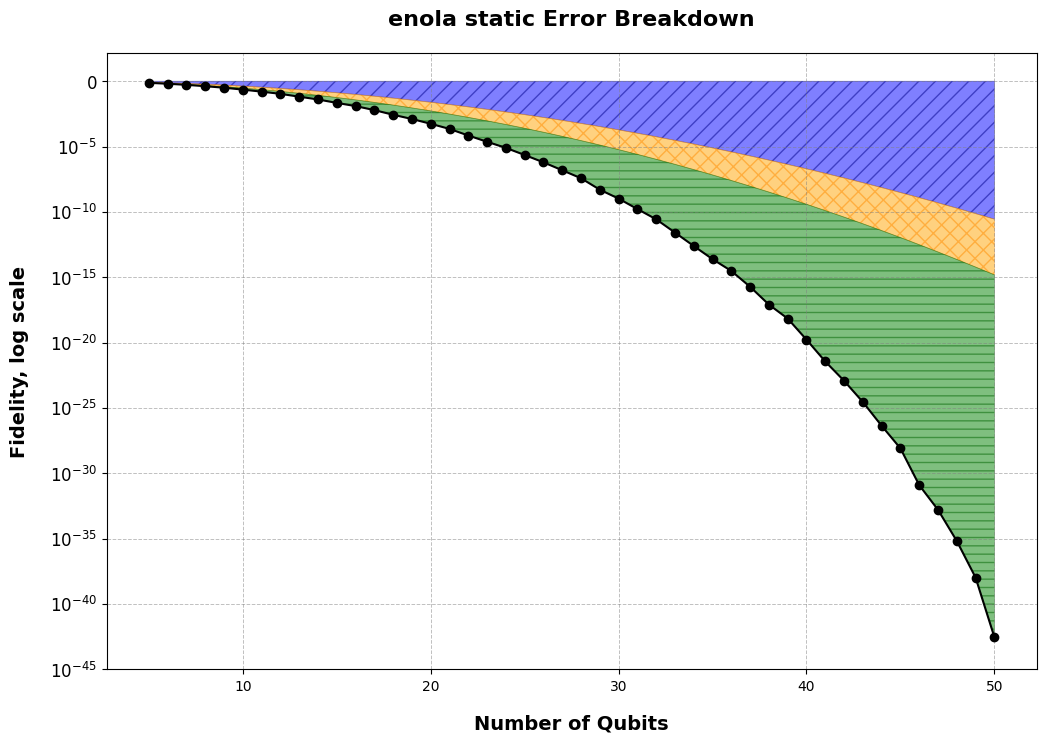

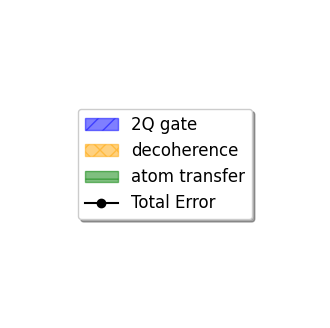

In [5]:
filename= '../data/enola/True_combined_main_results.csv'
name = 'enola static'
read_draw(filename,name)
draw_legend()

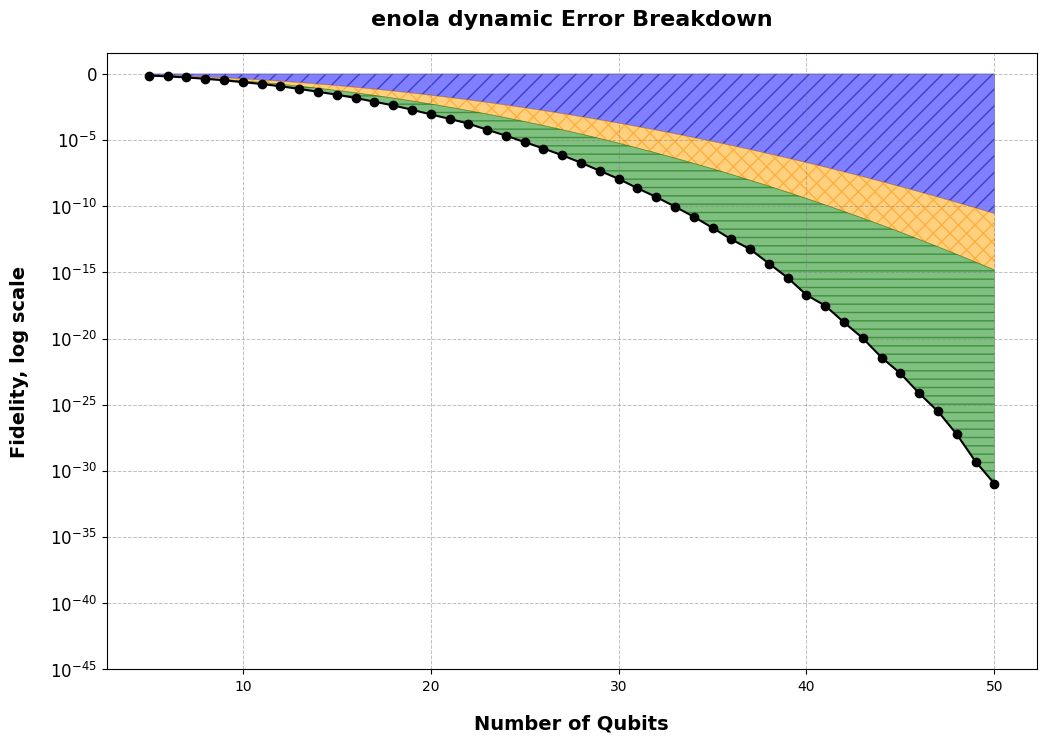

In [6]:
filename= '../data/enola/False_combined_main_results.csv'
name = 'enola dynamic'
read_draw(filename,name)

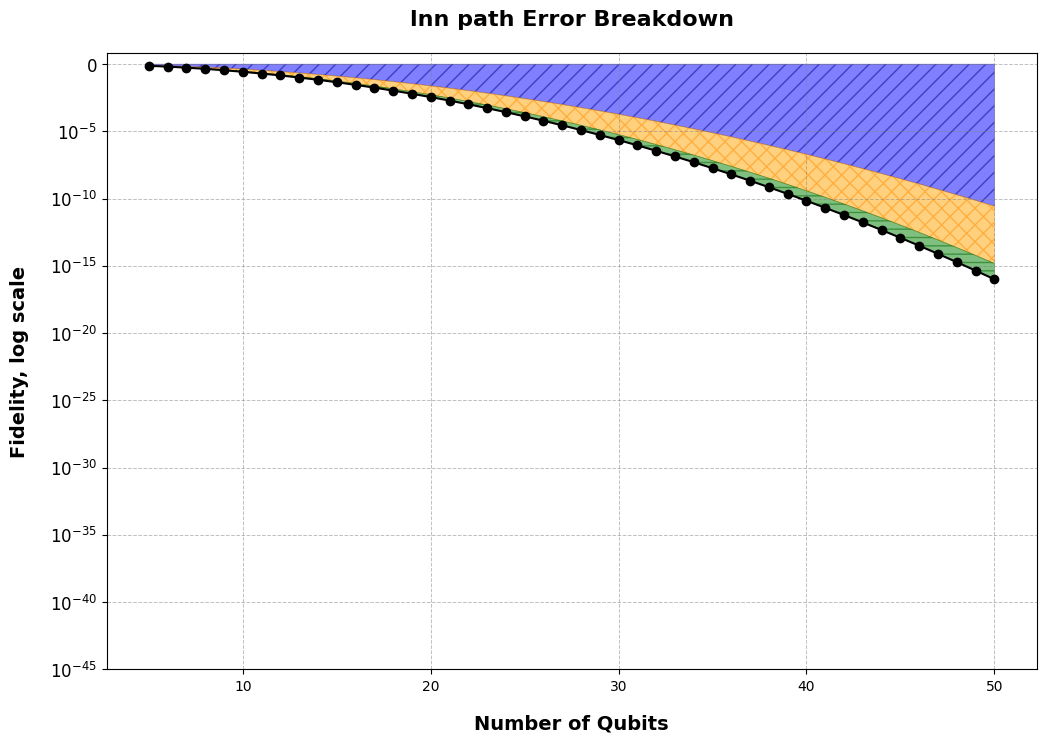

In [7]:
filename= '../data/False_combined_main_results_.csv'
name = 'lnn path'
read_draw(filename,name)

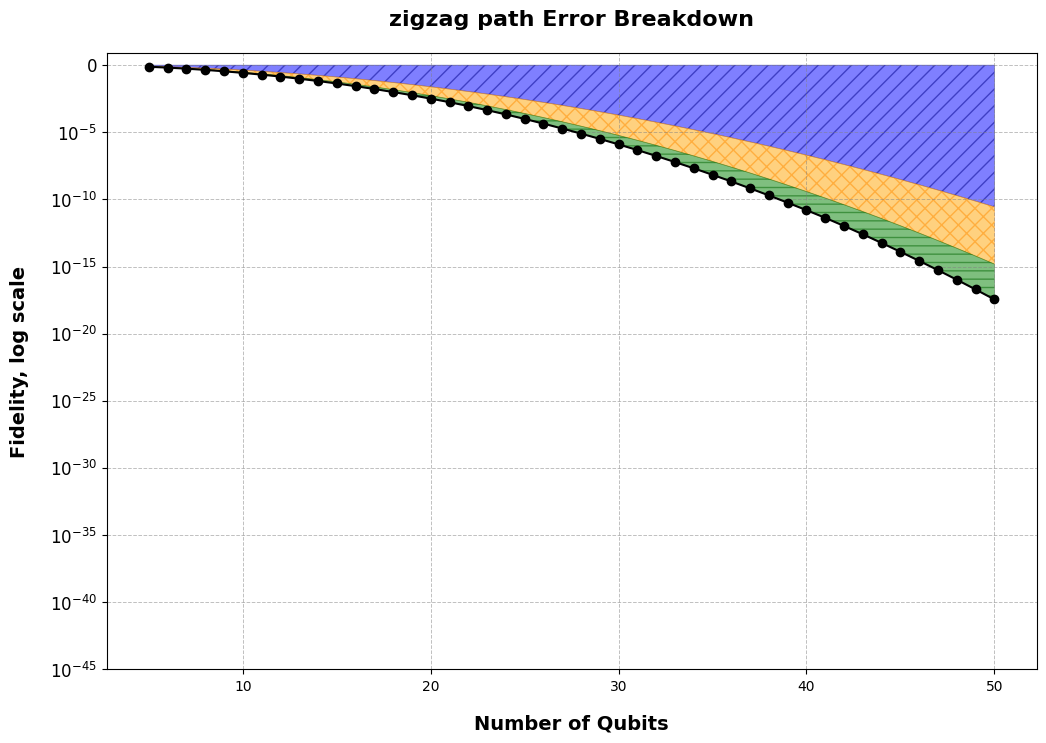

In [8]:
filename= '../data/True_combined_main_results_.csv'
name = 'zigzag path'
read_draw(filename,name)